In [1]:
#What is the problem??
#It dramatically depends on the kind of fantasy league you are playing
#(1)Trying to predict which player combinations will win you the most number of points in any given week?
#(2)Which players are going to be the best players next week/year/month?
#One thing that is interesting is that best players probably, but might not, add up to the best teams



In [1]:
import numpy as np
import pandas as pd
import requests
import keras
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline  


Using TensorFlow backend.


In [115]:
#http://danielfrg.com/blog/2013/04/01/nba-scraping-data/
url = 'http://espn.go.com/nba/teams'
r = requests.get(url)

soup = BeautifulSoup(r.text)
tables = soup.find_all('ul', class_='medium-logos')

teams = []
prefix_1 = []
prefix_2 = []
teams_urls = []
for table in tables:
    lis = table.find_all('li')
    for li in lis:
        info = li.h5.a
        teams.append(info.text)
        url = info['href']
        teams_urls.append(url)
        prefix_1.append(url.split('/')[-2])
        prefix_2.append(url.split('/')[-1])


dic = {'url': teams_urls, 'prefix_2': prefix_2, 'prefix_1': prefix_1}
teams = pd.DataFrame(dic, index=teams)

In [116]:
team_prefixes_bbal_ref = ['BOS', 'BRK', 'NYK', 'PHI', 'TOR', 'GSW', 'LAC', 'LAL', 'PHO', 'SAC', 
                          'CHI', 'CLE', 'DET', 'IND', 'MIL', 'DAL', 'HOU', 'MEM','SAS', 'ATL','CHO', 'MIA',
                         ]

,prefix_1,prefix_2,url
Boston Celtics,bos,boston-celtics,http://www.espn.com/nba/team/_/name/bos/boston...
Brooklyn Nets,bkn,brooklyn-nets,http://www.espn.com/nba/team/_/name/bkn/brookl...
New York Knicks,ny,new-york-knicks,http://www.espn.com/nba/team/_/name/ny/new-yor...
Philadelphia 76ers,phi,philadelphia-76ers,http://www.espn.com/nba/team/_/name/phi/philad...
Toronto Raptors,tor,toronto-raptors,http://www.espn.com/nba/team/_/name/tor/toront...
Golden State Warriors,gs,golden-state-warriors,http://www.espn.com/nba/team/_/name/gs/golden-...
LA Clippers,lac,la-clippers,http://www.espn.com/nba/team/_/name/lac/la-cli...
Los Angeles Lakers,lal,los-angeles-lakers,http://www.espn.com/nba/team/_/name/lal/los-an...
Phoenix Suns,phx,phoenix-suns,http://www.espn.com/nba/team/_/name/phx/phoeni...
Sacramento Kings,sac,sacramento-kings,http://www.espn.com/nba/team/_/name/sac/sacram...


In [114]:
BASE_URL_BBALL_REF = 'http://www.basketball-reference.com/teams/CLE/2017.html'
r = requests.get(BASE_URL_BBALL_REF)
table = BeautifulSoup(r.text)

In [119]:
BASE_URL_BBALL_REF = 'http://www.basketball-reference.com/teams/{0}/{1}.html'
r = requests.get(BASE_URL_BBALL_REF)
column_headers = [u'Name', u'Age', u'G', u'GS', u'MP', u'FG', u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%', u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'PTS']

for year in range(1995, 2018):
    player_data = []
    for index, row in teams.iterrows():
        r = requests.get(BASE_URL_BBALL_REF.format(row['prefix_1'].upper(), year))
        html = str(BeautifulSoup(r.text).find(id="all_totals"))
        formatted_html = html.replace("<!--", "")
        table = BeautifulSoup(formatted_html).find(id="totals").find_all('tr')
        player_data_per_team = []
        for row in table[1:]:
            data = [td.getText() for td in row.findAll('td')]
            player_data_per_team.append(data)
        without_totals = player_data_per_team[:-1]
        print(without_totals)
        #formatted_data = [[data[0].encode('utf-8')] + [float(x) for x in data[1:]] for data in without_totals]
        player_data.append(without_totals)
    df = pd.DataFrame(player_data, columns=column_headers)
    df.to_csv("player_stats_bball_ref" + str(year) + ".csv")

[[u'Dee Brown', u'26', u'79', u'69', u'2792', u'437', u'977', u'.447', u'126', u'327', u'.385', u'311', u'650', u'.478', u'.512', u'236', u'277', u'.852', u'63', u'186', u'249', u'301', u'110', u'49', u'146', u'181', u'1236'], [u'Dominique Wilkins', u'35', u'77', u'64', u'2423', u'496', u'1169', u'.424', u'112', u'289', u'.388', u'384', u'880', u'.436', u'.472', u'266', u'340', u'.782', u'157', u'244', u'401', u'166', u'61', u'14', u'173', u'130', u'1370'], [u'Eric Montross', u'23', u'78', u'75', u'2315', u'307', u'575', u'.534', u'0', u'1', u'.000', u'307', u'574', u'.535', u'.534', u'167', u'263', u'.635', u'196', u'370', u'566', u'36', u'29', u'61', u'112', u'299', u'781'], [u'Dino Radja', u'27', u'66', u'48', u'2147', u'450', u'919', u'.490', u'0', u'1', u'.000', u'450', u'918', u'.490', u'.490', u'233', u'307', u'.759', u'149', u'424', u'573', u'111', u'60', u'86', u'159', u'232', u'1133'], [u'Sherman Douglas', u'28', u'65', u'43', u'2048', u'365', u'769', u'.475', u'20', u'82', u

AttributeError: 'NoneType' object has no attribute 'find_all'

In [111]:
html = str(BeautifulSoup(r.text).find(id="all_totals"))
formatted = html.replace("<!--", "")
table = BeautifulSoup(formatted).find(id="totals").find_all('tr')

headers = [u'Name', u'Age', u'G', u'GS', u'MP', u'FG', u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%', u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'PTS']

player_data = []
for row in table[1:]: # Remove header
    data = [td.getText() for td in row.findAll('td')]
    player_data.append(data)
data_without_totals = player_data[:-1]
formatted_data = [[data[0].encode('utf-8')] + [float(x) for x in data[1:]] for data in data_without_totals]
pd.DataFrame(formatted_data, columns = headers)
        #player_data = []
#for row in table: # Remove header
 #   print(row.findAll('td').length)
  #  data = [x.getText() for x in row.findAll('td')]
   # formatted_data = [data[0].encode('utf-8')] + [float(x) for x in data[1:]]
    #player_data.append(formattedData)

,Name,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,LeBron James,32.0,50.0,50.0,1880.0,481.0,903.0,0.533,85.0,226.0,...,0.691,61.0,328.0,389.0,440.0,73.0,29.0,212.0,85.0,1289.0
1,Kyrie Irving,24.0,47.0,47.0,1653.0,427.0,917.0,0.466,113.0,286.0,...,0.900,36.0,115.0,151.0,275.0,58.0,12.0,129.0,99.0,1147.0
2,Tristan Thompson,25.0,53.0,53.0,1579.0,171.0,293.0,0.584,0.0,3.0,...,0.513,193.0,318.0,511.0,44.0,30.0,62.0,41.0,126.0,424.0
3,Kevin Love,28.0,46.0,46.0,1466.0,292.0,681.0,0.429,119.0,310.0,...,0.876,115.0,395.0,510.0,88.0,42.0,17.0,98.0,82.0,921.0
4,Iman Shumpert,26.0,49.0,13.0,1246.0,131.0,306.0,0.428,70.0,174.0,...,0.773,29.0,120.0,149.0,76.0,49.0,15.0,49.0,96.0,383.0
5,Richard Jefferson,36.0,52.0,6.0,1022.0,93.0,223.0,0.417,35.0,119.0,...,0.735,19.0,104.0,123.0,47.0,15.0,6.0,34.0,99.0,271.0
6,Channing Frye,33.0,46.0,3.0,827.0,145.0,327.0,0.443,89.0,211.0,...,0.826,26.0,136.0,162.0,29.0,18.0,22.0,32.0,85.0,417.0
7,DeAndre Liggins,28.0,44.0,19.0,642.0,46.0,116.0,0.397,17.0,44.0,...,0.677,12.0,62.0,74.0,45.0,39.0,13.0,31.0,65.0,130.0
8,J.R. Smith,31.0,21.0,21.0,607.0,62.0,184.0,0.337,50.0,138.0,...,0.778,8.0,37.0,45.0,26.0,26.0,9.0,15.0,47.0,181.0
9,Kyle Korver,35.0,17.0,0.0,431.0,65.0,129.0,0.504,44.0,88.0,...,0.875,6.0,43.0,49.0,13.0,6.0,3.0,16.0,28.0,181.0


# Collect data from espn from 2003 to 2017

In [481]:
BASE_URL = 'http://www.espn.com/nba/team/stats/_/name/{0}/year/{1}'

column_headers = [u'PLAYER', u'GP', u'GS', u'MIN', u'PPG', u'OFFR', u'DEFR', u'RPG', u'APG', u'SPG', u'BPG', u'TPG', u'FPG', u'A/TO', u'PER']

def normalizeColumn(column):
    theMax = column.max()
    theMin = column.min()
    normalizedColumn = [ (record - theMin) / (theMax - theMin) for record in column]
    return normalizedColumn

for year in range(2003, 2018):
    player_data = []
    for index, row in teams.iterrows():
        r = requests.get(BASE_URL.format(row['prefix_1'], year))
        table = BeautifulSoup(r.text).table
        for row in table.find_all('tr')[2:][:-1]: # Remove header
            data = [td.getText() for td in row.findAll('td')]
            formattedData = [data[0].encode('utf-8')] + [float(x) for x in data[1:]] #formats the none-name fields to floats so we can do math
            player_data.append(formattedData)
    df = pd.DataFrame(player_data, columns=column_headers)
    for column in df.iloc[:,1:]:
        data = normalizeColumn(df[column])
        df[column + "_Normalized"] = data
    df['scores_Normalized'] = df.iloc[:,15:].apply(sum, axis = 1)
    df.to_csv("player_stats_" + str(year) + ".csv")

# Normalize monster basketball data

In [115]:
def normalizeColumn(column):
    theMax = column.max()
    theMin = column.min()
    normalizedColumn = [ (record - theMin) / float((theMax - theMin)) for record in column]
    return normalizedColumn

categories = ['p','a','3','r','s','b','to', 'fg%','ft%','fta']
normed_categores = [cat + "_Normalized" for cat in categories]
dates = range(2004, 2018)
test = None
for date in dates:
    _file = 'monster_players_with_ranks_{0}.xls'.format(date)
    df = pd.read_excel(_file)
    for x in categories:
        cat = df[x]
        normed = normalizeColumn(cat)
        df[x + "_Normalized"] = normed
    scores = [sum([row[cat] for cat in normed_categores]) for label,row in df.iterrows()]
    df['normalized_score'] = scores
    df.to_csv("normalized_" + _file)

# Train LR Model Using monster data and features to predict my normalized scores

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


features = ['Age', 'g', 'S%',
       'm', 'p', '3', 'r', 'a', 's', 'b', 'fg%', 'fga', 'ft%', 'fta', 'to',
       '3%', '3a', '2%', '2a', 'adjfg%', 'dr', 'or', '2d', '3d', 'fg',
       'fgm', 'pf', 'ft', 'ftm', '3m', '2', 'ato', 'a+to', 'netft', 'to48',
       '3s48', 'dpg', 'ppg', 'g.1', 's+b', 'p48', 'str', 'a-to', 'tech',
       '3a/fga', 'ts%', 'USG', 'pV', '3V', 'rV', 'aV', 'sV', 'bV', 'fg%V',
       'ft%V', 'toV', '3%V', '2%V', 'adjfg%V', 'drV', 'orV', '2dV', '3dV',
       'fgV', 'fgaV', 'fgmV', 'pfV', 'ftV', 'ftaV', 'ftmV', 'mV', '3aV',
       '3mV', '2V', '2aV', 'atoV', 'netftV', 'to48V', '3s48V', 'dpgV',
       'ppgV', 's+bV', 'p48V', 'strV', 'a-toV', 'techV', '3a/fgaV', 'ts%V',
       'p_Normalized', 'a_Normalized', '3_Normalized', 'r_Normalized',
       's_Normalized', 'b_Normalized', 'to_Normalized', 'fg%_Normalized',
       'ft%_Normalized', 'fta_Normalized', 'normalized_score']


rankings = ['Y!Adp9', 'CBSAdp', 'CBSRank',
       'FanTraxADP', 'Y!ORank', 'Y!Avg$', 'Y!Proj$', 'NBA Salary',
       'ESPNAdp8', 'ESPNRank', 'ESPN$', 'ESPNProj$', 'Y!%', 'Value', 'Name', 'normalized_score']

y = 'normalized_score'

player_stats_by_year = []
for year in range(2004, 2016):
    if(year != 2017):
        thisYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year)+".xls")
        nextYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year+1)+".xls")
        scores_next_year = nextYear[['Name', y]]
        renamed_scores = scores_next_year.rename(index=str, columns={y: "y"})
        merged = pd.merge(thisYear, renamed_scores, on='Name')
        years = [year+1] * merged.shape[0]
        merged['year'] = years
        player_stats_by_year.append(merged)

all_player_data = pd.concat(player_stats_by_year)
lr = LinearRegression(n_jobs=-1)
X = all_player_data
y = all_player_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_features = X_train[features]
X_test_features = X_test[features]
lr.fit(X_train_features,y_train)
y_pred = [lr.predict([row]) for label,row in X_test_features.iterrows()]
mean_squared_error(y_test, X_test['normalized_score'])
mean_squared_error(y_test, y_pred)
#zip(y_test, y_pred, X_test['Name'], X_test['year'])


1115
1115


0.81393270127782247

# Plot mse as a function of the increasing that data

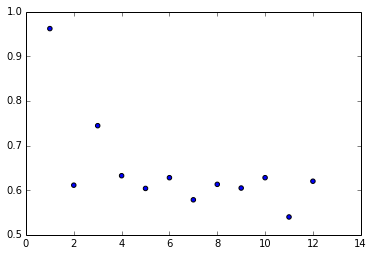

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


features = ['Age', 'g', 'S%',
       'm', 'p', '3', 'r', 'a', 's', 'b', 'fg%', 'fga', 'ft%', 'fta', 'to',
       '3%', '3a', '2%', '2a', 'adjfg%', 'dr', 'or', '2d', '3d', 'fg',
       'fgm', 'pf', 'ft', 'ftm', '3m', '2', 'ato', 'a+to', 'netft', 'to48',
       '3s48', 'dpg', 'ppg', 'g.1', 's+b', 'p48', 'str', 'a-to', 'tech',
       '3a/fga', 'ts%', 'USG', 'pV', '3V', 'rV', 'aV', 'sV', 'bV', 'fg%V',
       'ft%V', 'toV', '3%V', '2%V', 'adjfg%V', 'drV', 'orV', '2dV', '3dV',
       'fgV', 'fgaV', 'fgmV', 'pfV', 'ftV', 'ftaV', 'ftmV', 'mV', '3aV',
       '3mV', '2V', '2aV', 'atoV', 'netftV', 'to48V', '3s48V', 'dpgV',
       'ppgV', 's+bV', 'p48V', 'strV', 'a-toV', 'techV', '3a/fgaV', 'ts%V',
       'p_Normalized', 'a_Normalized', '3_Normalized', 'r_Normalized',
       's_Normalized', 'b_Normalized', 'to_Normalized', 'fg%_Normalized',
       'ft%_Normalized', 'fta_Normalized', 'normalized_score']


rankings = ['Y!Adp9', 'CBSAdp', 'CBSRank',
       'FanTraxADP', 'Y!ORank', 'Y!Avg$', 'Y!Proj$', 'NBA Salary',
       'ESPNAdp8', 'ESPNRank', 'ESPN$', 'ESPNProj$', 'Y!%', 'Value', 'Name', 'normalized_score']

y_target = 'normalized_score'

ranges = [range(x, 2016) for x in range(2004, 2016)]
error = []
for aRange in ranges:
    player_stats_by_year = []
    for year in aRange:
        thisYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year)+".xls")
        nextYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year+1)+".xls")
        scores_next_year = nextYear[['Name', y_target]]
        renamed_scores = scores_next_year.rename(index=str, columns={y_target: "y"})
        merged = pd.merge(thisYear, renamed_scores, on='Name')
        years = [year+1] * merged.shape[0]
        merged['year'] = years
        player_stats_by_year.append(merged)
    all_player_data = pd.concat(player_stats_by_year)
    lr = LinearRegression(n_jobs=-1)
    X = all_player_data
    y = all_player_data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    X_train_features = X_train[features]
    X_test_features = X_test[features]
    lr.fit(X_train_features,y_train)
    y_pred = [lr.predict([row]) for label,row in X_test_features.iterrows()]
    mse = mean_squared_error(y_test, y_pred)
    error.append((len(aRange), mse))
iters = zip(*error)[0]
mse = zip(*error)[1]
plt.scatter(x=iters, y=mse)

In [78]:
from sklearn.feature_selection import SelectKBest

# Feature selection - show features with lowest p values

In [99]:
sb = SelectKBest()
sb.fit(X[features].as_matrix(), np.array(y))
scores = zip(sb.pvalues_, features)
scores.sort(key=lambda tup: tup[0])
scores

[(0.0, '2d'),
 (0.0, '3d'),
 (1.4829373501353286e-11, '2dV'),
 (7.5578910929343581e-08, 'a-to'),
 (2.2858880262755766e-07, '3dV'),
 (1.3338496774609976e-06, 'a-toV'),
 (2.6154364883860668e-06, 'tech'),
 (8.2449248678592329e-06, 'adjfg%V'),
 (1.4306240722490147e-05, 'ft%V'),
 (1.8258388302648957e-05, 'strV'),
 (4.0052246475975171e-05, 'ts%V'),
 (5.9496512320509645e-05, 'a_Normalized'),
 (8.0069726299928737e-05, 'atoV'),
 (0.00013952663611017826, 'aV'),
 (0.00014485803106399213, 'a'),
 (0.00030685944995041654, 'orV'),
 (0.0007827863988802081, 'p48V'),
 (0.00081517436678226526, 'or'),
 (0.0008347584037434046, 'netftV'),
 (0.0010235070627873588, 'netft'),
 (0.0010878858637949789, 'a+to'),
 (0.001373378252696717, '2V'),
 (0.0014440994379485142, 'b_Normalized'),
 (0.0017037072522539391, '2%V'),
 (0.0021207164602998364, 's_Normalized'),
 (0.0021730184015560333, '3%V'),
 (0.0026545142744476692, '2aV'),
 (0.0028431627616083105, 'fta_Normalized'),
 (0.0029344945761125983, 'b'),
 (0.0029368427109

# Train using Keras Neural Net

Train on 3788 samples, validate on 669 samples
Epoch 1/20
3788/3788 [==============================] - 0s - loss: 4.5817 - val_loss: 1.5486
Epoch 2/20
3788/3788 [==============================] - 0s - loss: 1.2498 - val_loss: 0.6886
Epoch 3/20
3788/3788 [==============================] - 0s - loss: 0.8979 - val_loss: 0.6595
Epoch 4/20
3788/3788 [==============================] - 0s - loss: 0.8529 - val_loss: 0.5485
Epoch 5/20
3788/3788 [==============================] - 0s - loss: 0.9104 - val_loss: 0.5847
Epoch 6/20
3788/3788 [==============================] - 0s - loss: 0.8223 - val_loss: 0.6000
Epoch 7/20
3788/3788 [==============================] - 0s - loss: 0.8373 - val_loss: 0.6379
Epoch 8/20
3788/3788 [==============================] - 0s - loss: 0.7344 - val_loss: 0.5348
Epoch 9/20
3788/3788 [==============================] - 0s - loss: 0.7925 - val_loss: 0.5679
Epoch 10/20
3788/3788 [==============================] - 0s - loss: 0.7551 - val_loss: 0.6297
Epoch 11/20
3788/3788 

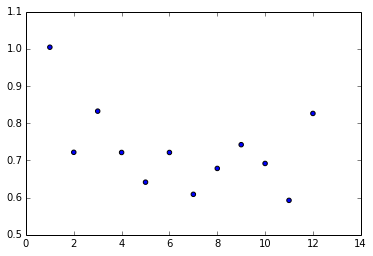

In [146]:
import numpy
import pandas
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model


ranges = [range(x, 2016) for x in range(2004, 2016)]
error = []
for aRange in ranges:
    player_stats_by_year = []
    for year in aRange:
        thisYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year)+".xls")
        nextYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year+1)+".xls")
        scores_next_year = nextYear[['Name', y_target]]
        renamed_scores = scores_next_year.rename(index=str, columns={y_target: "y"})
        merged = pd.merge(thisYear, renamed_scores, on='Name')
        years = [year+1] * merged.shape[0]
        merged['year'] = years
        player_stats_by_year.append(merged)
    all_player_data = pd.concat(player_stats_by_year)
    X = all_player_data
    y = all_player_data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    X_train_features = X_train[features]
    X_test_features = X_test[features]
    inputs = Input(shape=(shape,))
    hidden1 = Dense(10,init='normal', activation='relu')(inputs)
    predictions = Dense(1, init='normal')(hidden1)
    model = Model(input=inputs, output=predictions)
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X[features].as_matrix(), y,
              nb_epoch=20,
              validation_split=.15)
    y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X_test_features.iterrows()]
    mse = mean_squared_error(y_test, y_pred)
    error.append((len(aRange), mse))
iters = zip(*error)[0]
mse = zip(*error)[1]
plt.scatter(x=iters, y=mse)

In [111]:
import numpy
import pandas
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model

inputs = Input(shape=(shape,))
hidden1 = Dense(10,init='normal', activation='relu')(inputs)
predictions = Dense(1, init='normal')(hidden1)
model = Model(input=inputs, output=predictions)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X[features].as_matrix(), y,
          nb_epoch=20,
          validation_split=.15)

y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X_test_features.iterrows()]
mean_squared_error(y_test, y_pred)

Train on 3788 samples, validate on 669 samples
Epoch 1/20
3788/3788 [==============================] - 0s - loss: 8.2200 - val_loss: 2.3706
Epoch 2/20
3788/3788 [==============================] - 0s - loss: 1.7796 - val_loss: 1.3956
Epoch 3/20
3788/3788 [==============================] - 0s - loss: 1.1985 - val_loss: 0.8304
Epoch 4/20
3788/3788 [==============================] - 0s - loss: 0.9550 - val_loss: 0.7093
Epoch 5/20
3788/3788 [==============================] - 0s - loss: 0.8439 - val_loss: 0.6223
Epoch 6/20
3788/3788 [==============================] - 0s - loss: 0.8230 - val_loss: 0.6121
Epoch 7/20
3788/3788 [==============================] - 0s - loss: 0.7826 - val_loss: 0.9171
Epoch 8/20
3788/3788 [==============================] - 0s - loss: 0.8007 - val_loss: 0.5640
Epoch 9/20
3788/3788 [==============================] - 0s - loss: 0.8549 - val_loss: 0.6240
Epoch 10/20
3788/3788 [==============================] - 0s - loss: 0.7706 - val_loss: 0.5650
Epoch 11/20
3788/3788 

0.76335797823727125

In [63]:
import numpy
import pandas
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model

inputs = Input(shape=(shape,))
hidden1 = Dense(10,init='normal', activation='relu')(inputs)
hidden2 = Dense(10,init='normal', activation='relu')(hidden1)
hidden3 = Dense(10,init='normal', activation='relu')(hidden2)
predictions = Dense(1, init='normal')(hidden3)
model = Model(input=inputs, output=predictions)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_features.as_matrix(), y_train,
          nb_epoch=10,
          validation_split=.15)

y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X_test_features.iterrows()]
mean_squared_error(y_test, y_pred)

Train on 2840 samples, validate on 502 samples
Epoch 1/10
2840/2840 [==============================] - 0s - loss: 3.2912 - val_loss: 1.3485
Epoch 2/10
2840/2840 [==============================] - 0s - loss: 1.1649 - val_loss: 1.2210
Epoch 3/10
2840/2840 [==============================] - 0s - loss: 0.9603 - val_loss: 0.8507
Epoch 4/10
2840/2840 [==============================] - 0s - loss: 0.7664 - val_loss: 0.7606
Epoch 5/10
2840/2840 [==============================] - 0s - loss: 0.7705 - val_loss: 0.7957
Epoch 6/10
2840/2840 [==============================] - 0s - loss: 0.7362 - val_loss: 0.7548
Epoch 7/10
2840/2840 [==============================] - 0s - loss: 0.7633 - val_loss: 0.7666
Epoch 8/10
2840/2840 [==============================] - 0s - loss: 0.7390 - val_loss: 0.7435
Epoch 9/10
2840/2840 [==============================] - 0s - loss: 0.7104 - val_loss: 0.7050
Epoch 10/10
2840/2840 [==============================] - 0s - loss: 0.7396 - val_loss: 0.7211


0.72681770363054476

### zip(y_test, y_pred)

In [59]:
all_data = pd.read_csv('normalized_monster_players_with_ranks_2017.xls')
players = all_data.Name
X = all_data[features]
y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X.iterrows()]
pred_2017 = pd.concat([players,pd.Series(y_pred, name="score")], axis=1)
pred_2017.sort_values(by=['score'], ascending=False)

,Name,score
1,James Harden,5.944705
4,Russell Westbrook,5.727851
2,Stephen Curry,4.634020
0,Kevin Durant,4.541718
14,DeMarcus Cousins,4.537194
9,LeBron James,4.444879
20,John Wall,4.430092
8,Isaiah Thomas,4.419591
6,Giannis Antetokounmpo,4.344743
3,Anthony Davis,4.219548


In [41]:
stats_2015 = pd.read_csv('normalized_monster_players_with_ranks_2016.xls')
stats_2015.loc[stats_2015['Name'] == 'James Harden'].normalized_score

2    7.041866
Name: normalized_score, dtype: float64

In [83]:
all_data = pd.read_csv('normalized_monster_players_with_ranks_2017.xls')
players = all_data.Name
X = all_data[features]
y_pred = [lr.predict([row])[0] for label,row in X.iterrows()]
pred_2017 = pd.concat([players,pd.Series(y_pred, name="score")], axis=1)
pred_2017.sort_values(by=['score'], ascending=False)

,Name,score
4,Russell Westbrook,8.197570
1,James Harden,7.588382
0,Kevin Durant,5.952823
6,Giannis Antetokounmpo,5.872150
5,Kawhi Leonard,5.616352
3,Anthony Davis,5.592807
2,Stephen Curry,5.451217
9,LeBron James,5.415466
39,Draymond Green,5.274482
14,DeMarcus Cousins,5.181652


In [102]:
t = pd.read_csv('normalized_monster_players_with_ranks_2016.xls')
t.shape[0]

465

# Train model and calculate mean absolute error on data from 2005 to 2016

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

player_stats_by_year = []
for year in range(2005, 2017):
    if(year != 2016):
        thisYear = pd.read_csv('player_stats_'+str(year)+".csv")
        nextYear = pd.read_csv('player_stats_'+str(year+1)+".csv")
        scores_next_year = nextYear[['PLAYER', 'scores_Normalized']]
        renamed_scores = scores_next_year.rename(index=str, columns={"scores_Normalized": "y"})
        merged = pd.merge(thisYear, renamed_scores, on='PLAYER')
        player_stats_by_year.append(merged)

all_player_data = pd.concat(player_stats_by_year)
lr = LinearRegression(n_jobs=-1)
X = all_player_data.iloc[:,2:16]
y = all_player_data.iloc[:,31]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr.fit(X_train,y_train)
y_pred = [lr.predict([row]) for label,row in X_test.iterrows()]
mean_absolute_error(y_test, y_pred)

/Library/Python/2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.89489443047647532

# Test model on 2017 to predict for 2018

In [479]:
all_data = pd.read_csv('player_stats_2017')
X = pd.read_csv('player_stats_2017').iloc[:,2:16]
players = all_data.PLAYER
y_pred = [lr.predict([row])[0] for label,row in X.iterrows()]
pred_2017 = pd.concat([players,pd.Series(y_pred, name="score")], axis=1)
pred_2017.sort_values(by=['score'], ascending=False)

,PLAYER,score
426,"Russell Westbrook, PG",10.510057
249,"James Harden, SG",9.991176
280,"Anthony Davis, PF",9.501400
139,"DeMarcus Cousins, PF",9.441470
216,"Giannis Antetokounmpo, SF",9.104813
170,"LeBron James, SF",8.709306
411,"Karl-Anthony Towns, C",8.593087
379,"John Wall, PG",8.562143
188,"Andre Drummond, C",8.450731
78,"Kevin Durant, SF",8.267729


In [48]:
range(2003, 2017)

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]